In [1]:
import torch
import clip
from PIL import Image

import numpy as np

/home/roi/anaconda3/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
device = 'cpu'
model, preprocess = clip.load("ViT-B/32", device=device)

## Cargamos la imagen

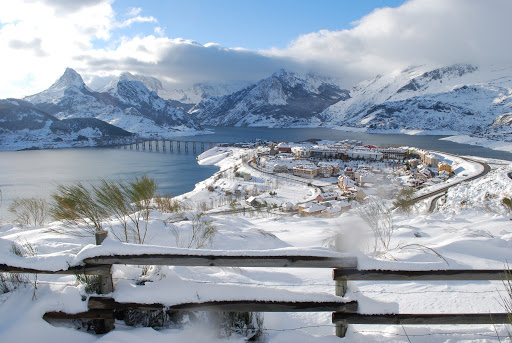

In [3]:
img = Image.open("r.jpg")
img

## Escribimos textos que puedan estar relacionados

In [4]:
text = ["The mountains are full of snow", "This dog is so cute!"]

## Preprocesamos

In [9]:
img_p = preprocess(img).unsqueeze(0).to(device)
text_p = clip.tokenize(text).to(device)

## Calculamos la probabilidad

In [10]:
logits_per_image, logits_per_text = model(img_p, text_p)
probs = logits_per_image.softmax(dim=-1).cpu()

In [11]:
probs

tensor([[9.9997e-01, 2.5679e-05]], grad_fn=<SoftmaxBackward>)